In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

test_functions =[StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky]

### Bayesian optimization function

### Latin Hypercube sampling function

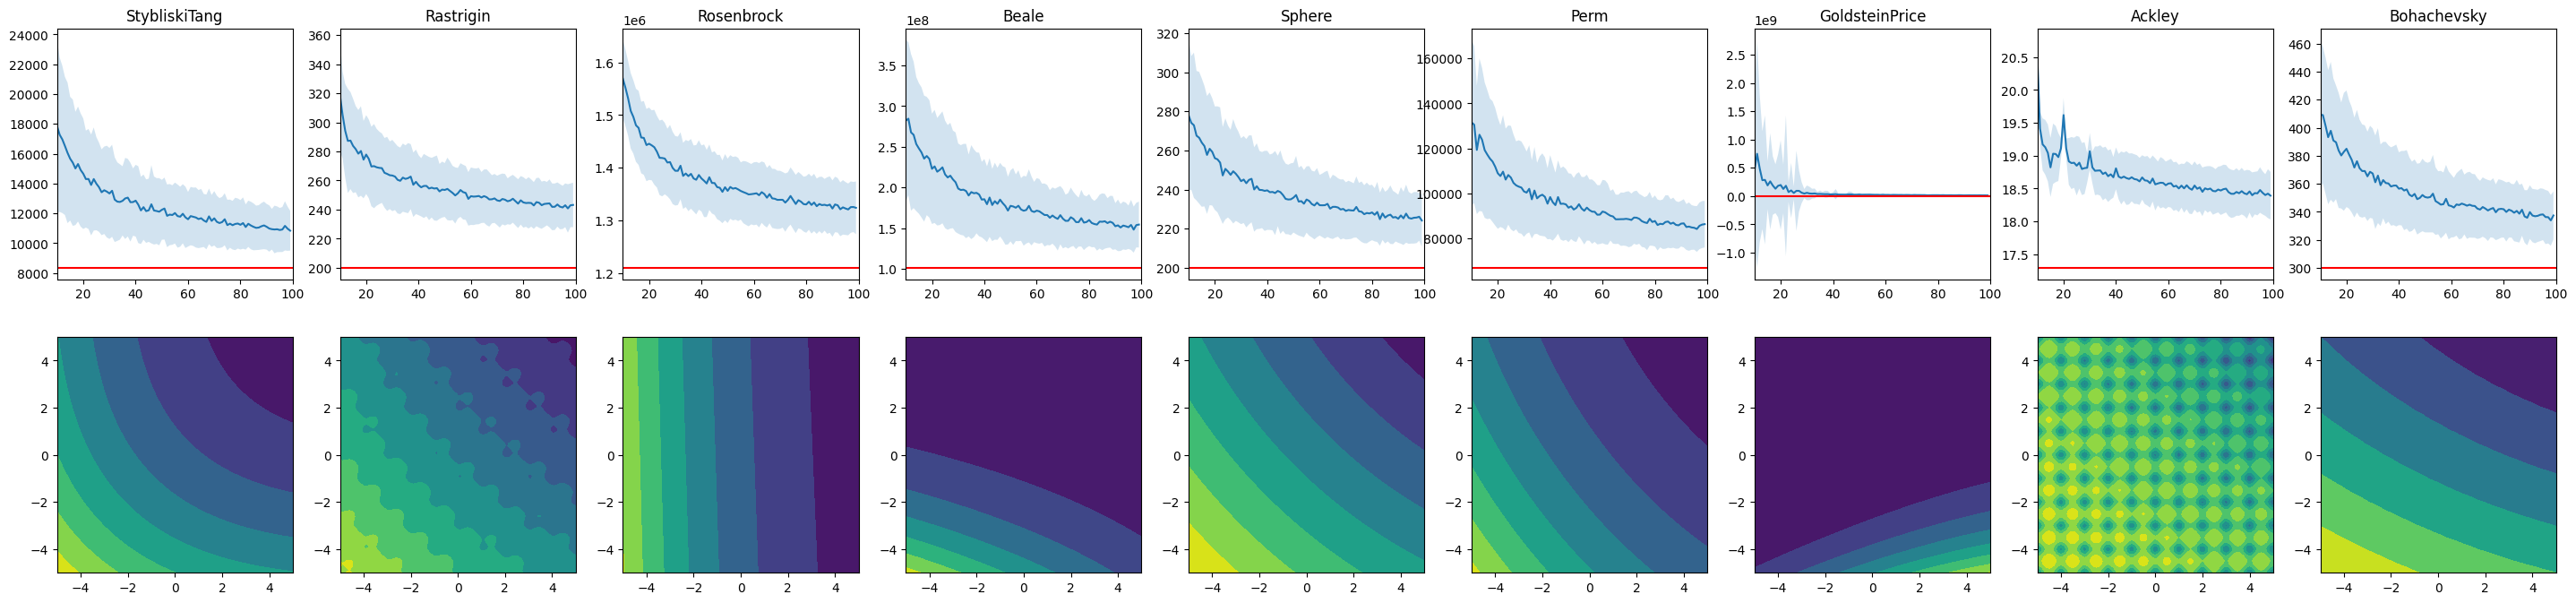

In [2]:
tests = 250
min_budget, max_budget = 10, 100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))


for idx, fcn in enumerate(test_functions):

    # Apply offset
    test_function = lambda x: fcn(x - 15)

    Fx = test_function(points.T)
    # Iterate over the budgets
    Ymean, Ystd, Ytests = [], [], []
    for budget in range(min_budget, max_budget):
        Ytests.clear()
        # Perform the tests
        for test in range(tests):
            Xmin, Ymin, _, _ = latin_hypercube(test_function, n_samples=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
            Ytests.append(Ymin)

        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))

    # Estimate mean and std of the tests
    Ymean, Ystd = np.array(Ymean), np.array(Ystd)

    # Plot the performances
    ax[0,idx].plot(range(min_budget, max_budget), Ymean)
    ax[0,idx].fill_between(range(min_budget, max_budget), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=min_budget, xmax=max_budget)
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')    

plt.show()

### Sobol sampling function

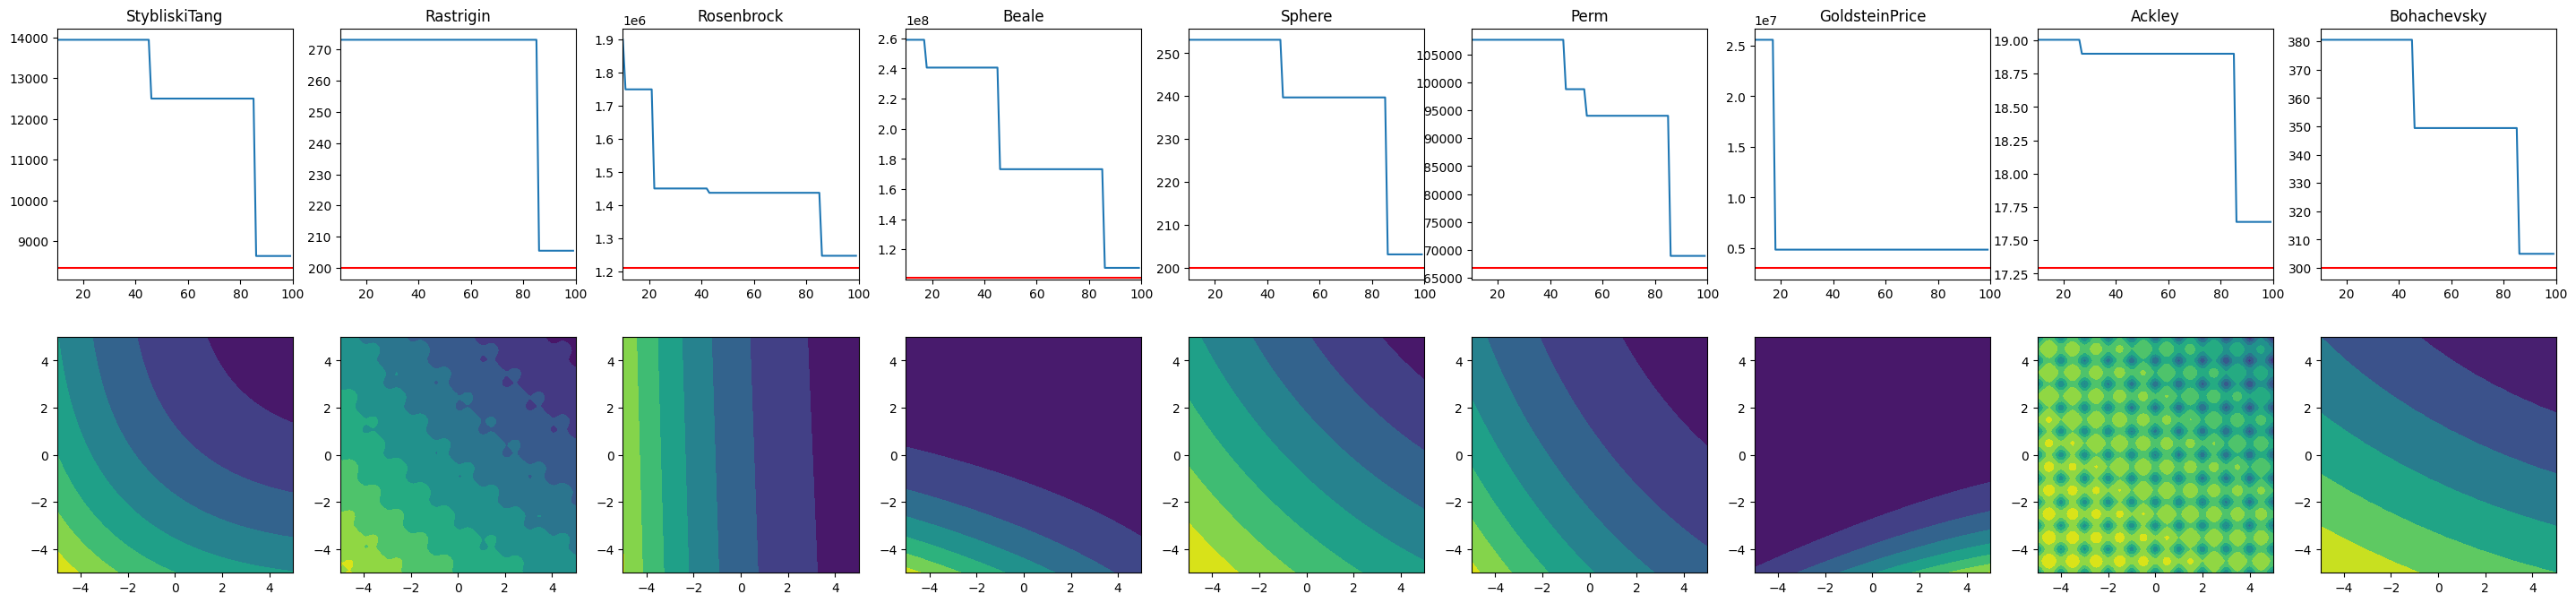

In [3]:
tests = 250
min_budget, max_budget = 10, 100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))


for idx, fcn in enumerate(test_functions):

    # Apply offset
    test_function = lambda x: fcn(x - 15)

    Fx = test_function(points.T)
    # Iterate over the budgets
    Ymean, Ystd, Ytests = [], [], []
    for budget in range(min_budget, max_budget):
        Ytests.clear()
        # Perform the tests
        for test in range(tests):
            Xmin, Ymin, _, _ = sobol(test_function, n_samples=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
            Ytests.append(Ymin)
        
        # Estimate mean and std of the tests
        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))


    Ymean, Ystd = np.array(Ymean), np.array(Ystd)

    # Plot the performances
    ax[0,idx].plot(range(min_budget, max_budget), Ymean)
    ax[0,idx].fill_between(range(min_budget, max_budget), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=min_budget, xmax=max_budget)
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

plt.show()

### Particle Swarm optimization function

[StybliskiTang] Min: -73.60410692464183 with 97 particles
[Rastrigin] Min: 3.3020602229682856 with 9 particles
[Rosenbrock] Min: 3.85039947652966 with 95 particles
[Beale] Min: 0.7167124753392115 with 97 particles
[Sphere] Min: 0.15442917072763293 with 10 particles
[Perm] Min: 0.7514077345574524 with 11 particles
[GoldsteinPrice] Min: 114.63989810551107 with 10 particles
[Ackley] Min: 1.625219164961971 with 7 particles
[Bohachevsky] Min: 0.5707810641047961 with 9 particles


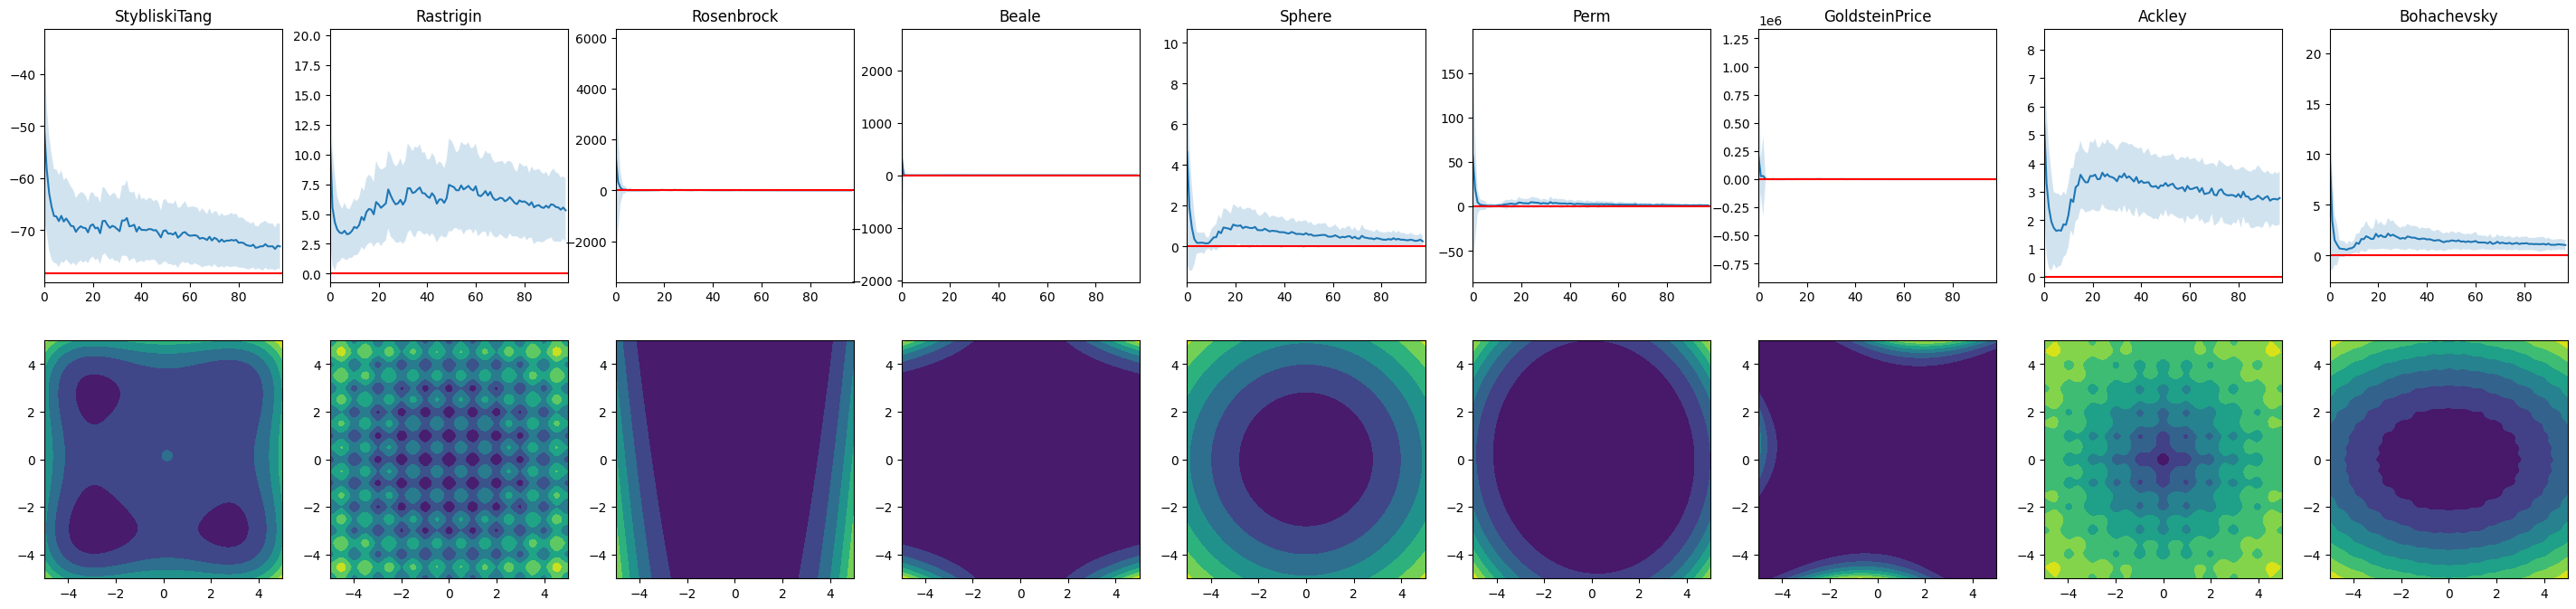

In [4]:
tests = 250
max_budget = 100
min_particles, max_particles = 2,100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))
color = iter(cm.rainbow(np.linspace(0,1,max_particles - min_particles + 1)))

for idx, fcn in enumerate(test_functions):
    color = iter(cm.rainbow(np.linspace(0,1,max_particles - min_particles + 1)))
    
    Fx = fcn(points.T)
    Ymean, Ystd, Ytests = [], [], []
    for n_particles in range(min_particles, max_particles):
        Ytests.clear()
        for test in range(tests):
            _, Ymin, _, _ = particle_swarm(fcn, dimension=2, pos_boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=max_budget, n_particles=n_particles)
            Ytests.append(Ymin)

        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))


    Ymean, Ystd = np.array(Ymean), np.array(Ystd)
    print(f"[{fcn.__name__}] Min: {np.min(Ymean)} with {np.argmin(Ymean) + min_particles} particles")
    # Plot the performances
    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=0, xmax=len(Ymean))
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

plt.show()


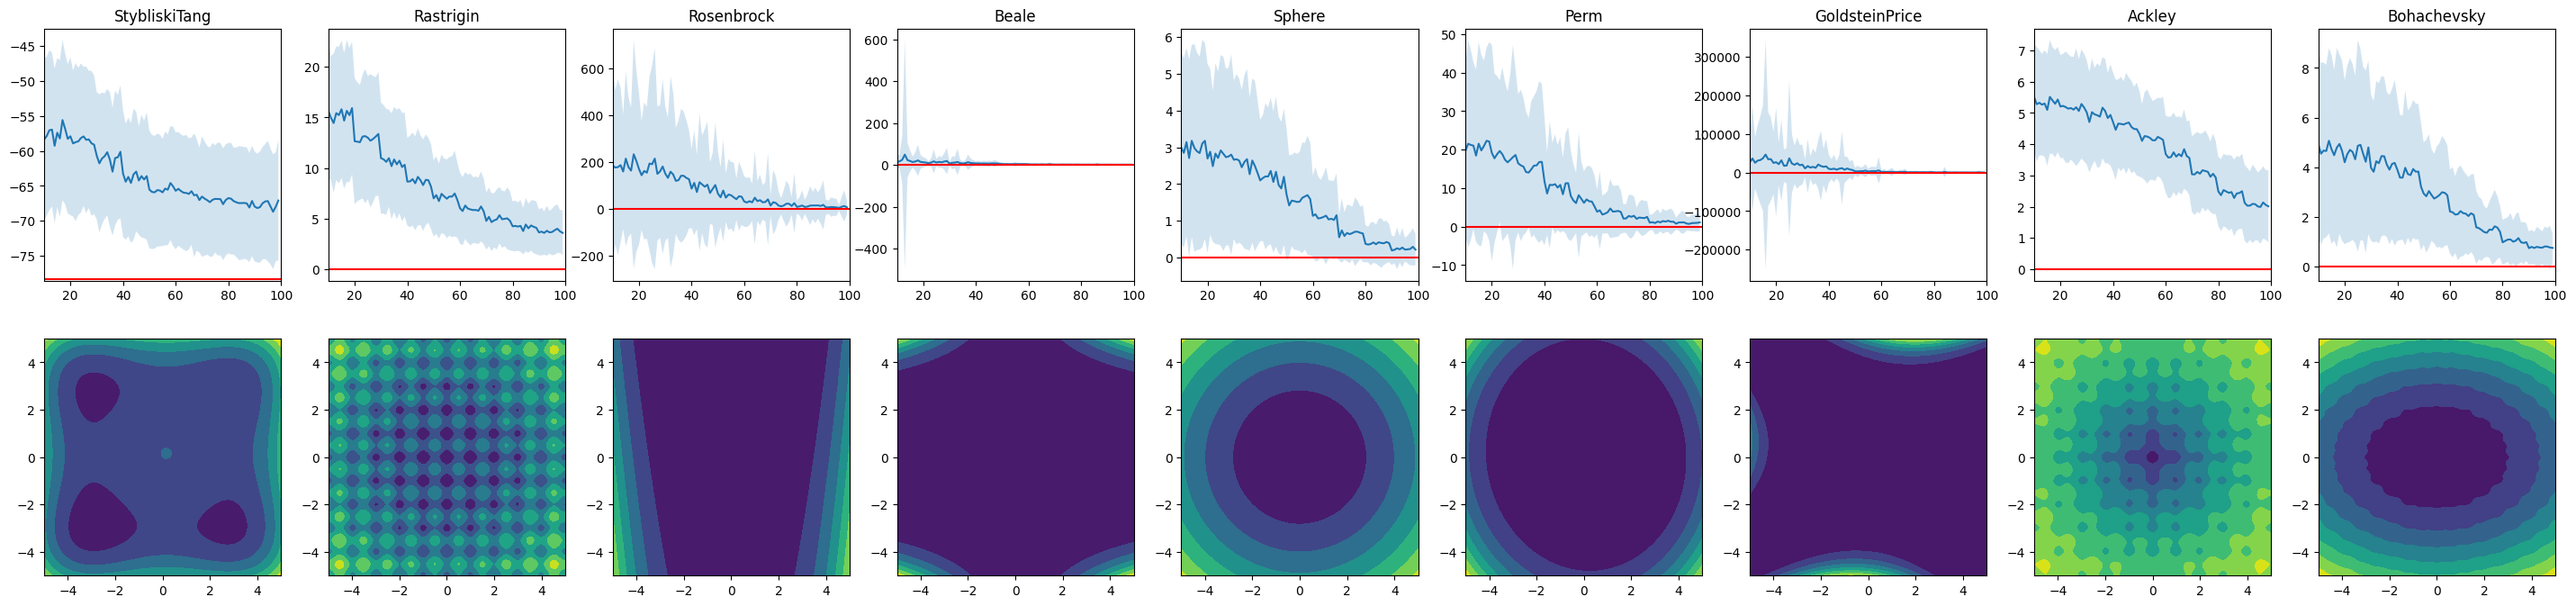

In [3]:
tests = 250
min_budget, max_budget = 10, 100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))


for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)
    # Iterate over the budgets
    Ymean, Ystd, Ytests = [], [], []

    for budget in range(min_budget, max_budget):
        Ytests.clear()
        # Perform the tests
        for test in range(tests):
            Xmin, Ymin, _, _ = particle_swarm(fcn, dimension=2, pos_boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, n_particles=10)
            Ytests.append(Ymin)

        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))

    # Estimate mean and std of the tests
    Ymean, Ystd = np.array(Ymean), np.array(Ystd)

    # Plot the performances
    ax[0,idx].plot(range(min_budget, max_budget), Ymean)
    ax[0,idx].fill_between(range(min_budget, max_budget), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=min_budget, xmax=max_budget)
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')    
    
plt.show()

### Nelder Mead optimization function

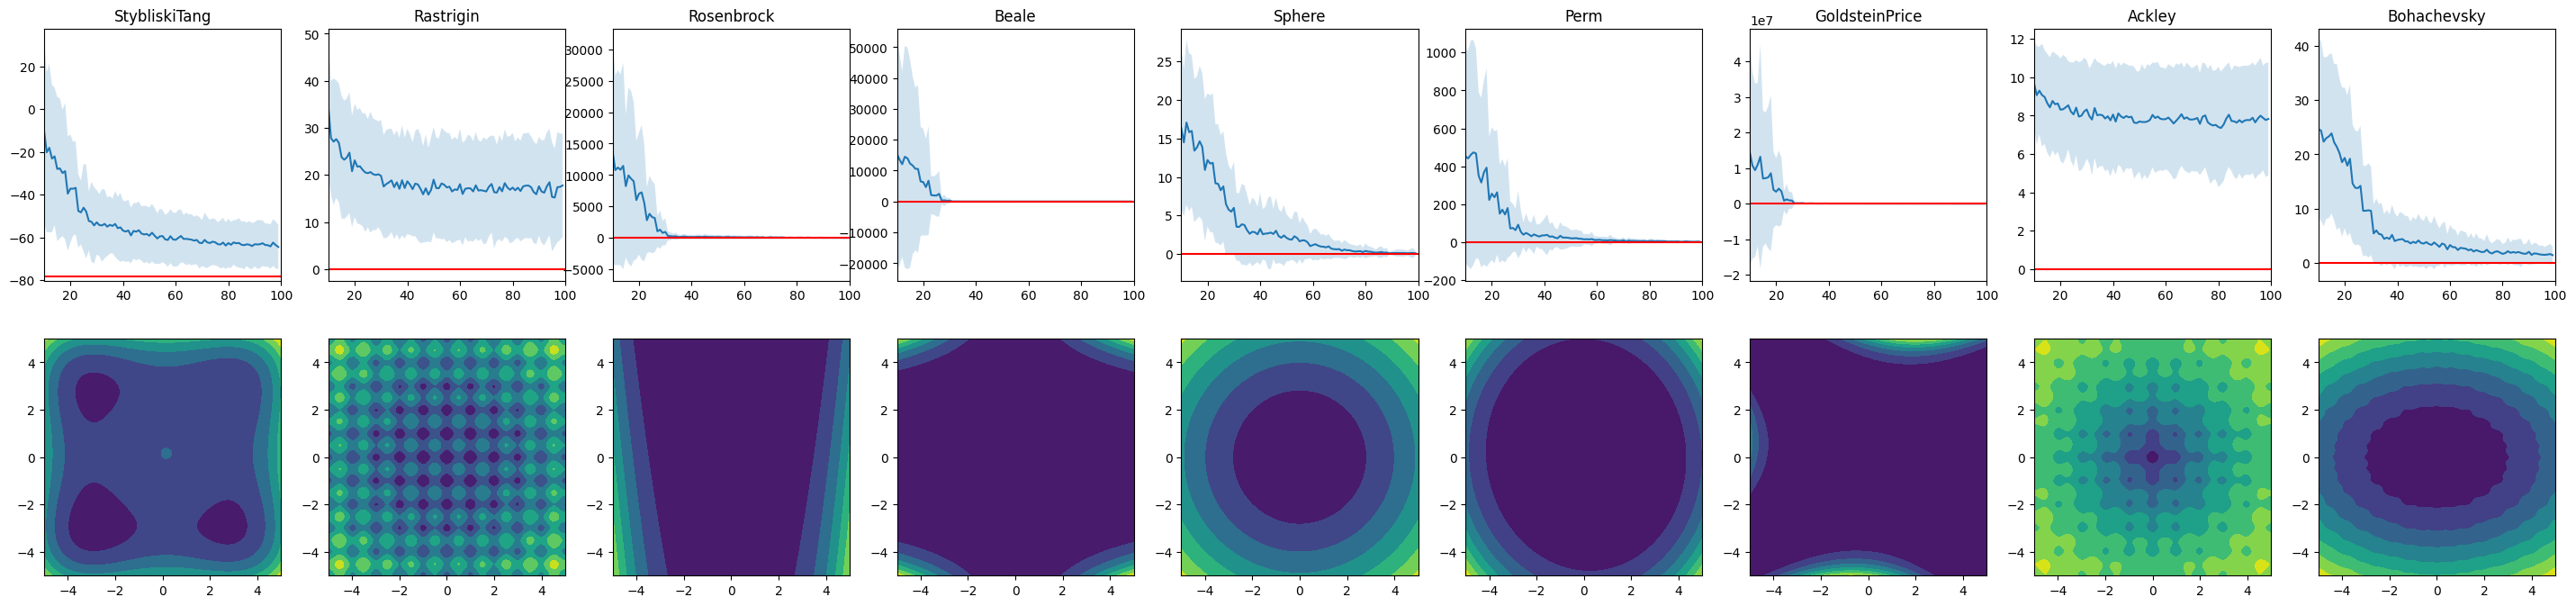

In [2]:
tests = 250
min_budget, max_budget = 10, 100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))


for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)
    # Iterate over the budgets
    Ymean, Ystd, Ytests = [], [], []
    for budget in range(min_budget, max_budget):
        Ytests.clear()
        # Perform the tests
        for test in range(tests):
            Xmin, Ymin, _, _ = nelder_mead(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], step=0.1, 
                                            no_improve_thr=10e-6, no_improv_break=10, 
                                            sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
            Ytests.append(Ymin)

        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))

    # Estimate mean and std of the tests
    Ymean, Ystd = np.array(Ymean), np.array(Ystd)

    # Plot the performances
    ax[0,idx].plot(range(min_budget, max_budget), Ymean)
    ax[0,idx].fill_between(range(min_budget, max_budget), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=min_budget, xmax=max_budget)
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')    
    
plt.show()

### Response Surface Modeling function

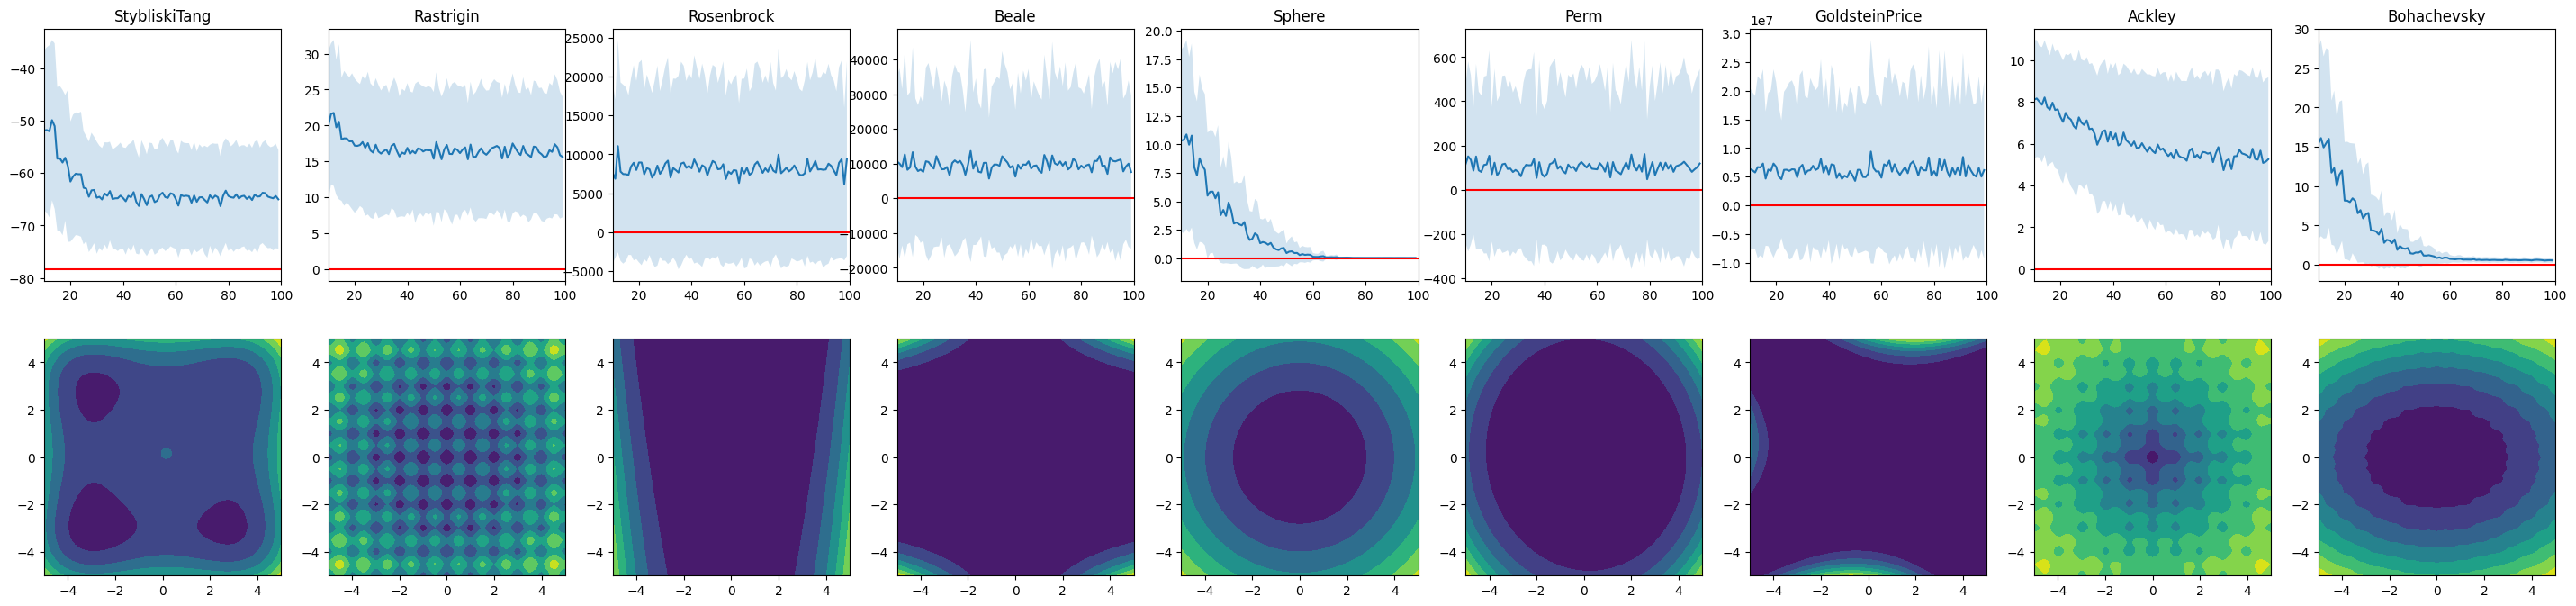

In [2]:
tests = 250
min_budget, max_budget = 10, 100

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))


for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)
    # Iterate over the budgets
    Ymean, Ystd, Ytests = [], [], []

    for budget in range(min_budget, max_budget):
        Ytests.clear()
        # Perform the tests
        for test in range(tests):
            Xmin, Ymin, _, _ = response_surface(fcn, boundaries=[[-5,-5],[5,5]], dimension=2, sampling_budget=budget, tol = 1e-8, 
                                                sampling_method="box_behnken", sampling_bound=0.5, iteration_method="gradient", learning_rate=0.01)
            Ytests.append(Ymin)

        Ymean.append(np.mean(Ytests))
        Ystd.append(np.std(Ytests))

    # Estimate mean and std of the tests
    Ymean, Ystd = np.array(Ymean), np.array(Ystd)

    # Plot the performances
    ax[0,idx].plot(range(min_budget, max_budget), Ymean)
    ax[0,idx].fill_between(range(min_budget, max_budget), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
    ax[0,idx].set_xlim(xmin=min_budget, xmax=max_budget)
    ax[0,idx].set_title(fcn.__name__)
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')    
    
plt.show()

### Broyden–Fletcher–Goldfarb–Shanno optimization function

In [3]:
x, y, _, _ = bfgs(StybliskiTang, dimension=2, boundaries=[[-5,-5],[5,5]], sampling_budget=100, tol=10e-6, verbose=False)
print(y)
print(x)

nan
[nan nan]


c:\Users\poselin\Documents\algorithm_development\benchmark\benchmarkFunctions.py:18: RuntimeWarning: overflow encountered in power
  f += xi**4 - 16*xi**2 + 5*xi
c:\Users\poselin\Documents\algorithm_development\algorithms\BFGS.py:53: RuntimeWarning: invalid value encountered in matmul
  B_inv = (np.eye(dimension) - (x_delta @ y.T)/ (y.T @ x_delta)) @ B_inv @ (np.eye(dimension) - (y @ x_delta.T)/(y.T @ x_delta)) + (x_delta @ x_delta.T)/(y.T @ x_delta)
